## **Table of Contents**
  1. Gathering the Data
  2. Data Preprocess
  3. Data Analysis

##**Hollywood Movie Production Sales**
**Introduction**

This notebook will be looking at and analyzing sample data containing information on Hollywood productions. This sample data stretches from 2007 - 2012, and contains the following information.

**Fields in HollywoodsMostProfitableStories.csv**

  - Film name
  - Genre
  - Lead Studio
  - Audience Score %
  - Profitability
  - Rotten Tomato Score %
  - World Wide Gross Profit
  - Year

<a gathering-the-data="gathering-data"></a>
### Gathering the Data 

In [25]:
# Initialize libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reads the file and outputs a snippet of the data set
# Showing us what the fields of the file
df = pd.read_csv('/HollywoodsMostProfitableStories.csv')
df.head(15)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
5,Beginners,Comedy,Independent,80.0,4.471875,84.0,14.310000,2011
6,Dear John,Drama,Sony,66.0,4.598800,29.0,114.970000,2010
7,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652,2007
8,Fireproof,Drama,Independent,51.0,66.934000,40.0,33.467000,2008
9,Four Christmases,Comedy,Warner Bros.,52.0,2.022925,26.0,161.834000,2008


In [8]:
df.rename(columns={'Audience  score %': 'audience_rating', 'Rotten Tomatoes %': 'rotton_tomatoes_score' }, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Film                   74 non-null     object 
 1   Genre                  74 non-null     object 
 2   Lead Studio            73 non-null     object 
 3   audience_rating        73 non-null     float64
 4   Profitability          71 non-null     float64
 5   rotton_tomatoes_score  73 non-null     float64
 6   Worldwide Gross        74 non-null     float64
 7   Year                   74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


<a data-pre="data-pre"></a>
### Data Preprocess

In [9]:
# Here we are looking at the columns and changing the column names
# Into columns names that are lower case and easier to work with
df = df.rename(columns = lambda x: x.lower())
df.columns

Index(['film', 'genre', 'lead studio', 'audience_rating', 'profitability',
       'rotton_tomatoes_score', 'worldwide gross', 'year'],
      dtype='object')

In [10]:
# Now we want to start checking if the data we have is clean
df.duplicated().sum()

0

Are data does not contain any duplicates so we move onto seeing if there are missing pieces of data.

In [11]:
df.isnull().sum()

film                     0
genre                    0
lead studio              1
audience_rating          1
profitability            3
rotton_tomatoes_score    1
worldwide gross          0
year                     0
dtype: int64

Next we will fix the cases of null data in the dataset

In [12]:
df[df['lead studio'].isna()]

,film,genre,lead studio,audience_rating,profitability,rotton_tomatoes_score,worldwide gross,year
38,No Reservations,Comedy,NaN,64.0,3.30718,39.0,92.60105,2007


In [13]:
df = df.dropna(subset=['lead studio']).reset_index(drop=True)

In [14]:
df.isnull().sum()

film                     0
genre                    0
lead studio              0
audience_rating          1
profitability            3
rotton_tomatoes_score    1
worldwide gross          0
year                     0
dtype: int64

The next parts of this is repeating the same thing for the next null values

In [16]:
df[df['audience_rating'].isna()]

,film,genre,lead studio,audience_rating,profitability,rotton_tomatoes_score,worldwide gross,year
49,Something Borrowed,Romance,Independent,NaN,1.719514,NaN,60.183,2011


In [17]:
df = df.dropna(subset=['audience_rating']).reset_index(drop=True)
df.isnull().sum()

film                     0
genre                    0
lead studio              0
audience_rating          0
profitability            3
rotton_tomatoes_score    0
worldwide gross          0
year                     0
dtype: int64

In [18]:
df[df['profitability'].isna()]

,film,genre,lead studio,audience_rating,profitability,rotton_tomatoes_score,worldwide gross,year
18,Jane Eyre,Romance,Universal,77.0,NaN,85.0,30.147,2011
40,Our Family Wedding,Comedy,Independent,49.0,NaN,14.0,21.370,2010
68,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040,2010


In [19]:
df = df.dropna(subset=['profitability']).reset_index(drop=True)
df.isnull().sum()

film                     0
genre                    0
lead studio              0
audience_rating          0
profitability            0
rotton_tomatoes_score    0
worldwide gross          0
year                     0
dtype: int64

## **Data Visualization**

Now we will start with finding more insights into the data and the first deep dive we will go into will be finding data pertaining to genre and profitability. 

In [ ]:
plt.style.use('ggplot')
color = sb.color_palette()[0]

# Filters for the given genres
comedy_df = df[df['genre'] == 'Comedy']
romance_df = df[df['genre'] == 'Romance']
drama_df = df[df['genre'] == 'Drama']
action_df = df[df['genre'] == 'Action']
animation_df = df[df['genre'] == 'Animation']
fantasy_df = df[df['fantasy'] == 'Fantasy']

Text(0.5, 1.0, 'Distribution of Movies Per Genre')

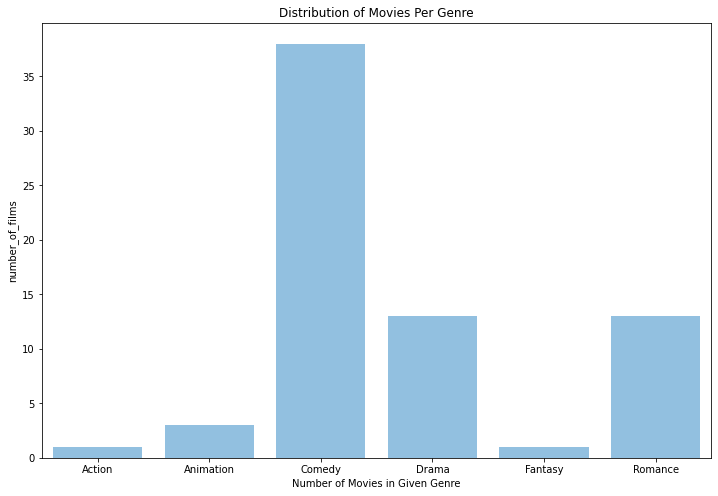

In [42]:
movies_per_genre = df.groupby(['genre'], as_index=False).film \
                      .count() \
                      .rename(columns={'film': 'number_of_films'})
plt.figure(figsize=(12, 8))
ax = sb.barplot(x=movies_per_genre.genre, y=movies_per_genre.number_of_films, color='#85c2ed')
plt.xlabel('Number of Movies in Given Genre')
plt.title('Distribution of Movies Per Genre')

Here we can see that there is a large number of Comedy compared to the others, in later parts of the analysis this will have to be taken into account, as well as other categories such as Action, and Fantasy.